# Pandas-demo: EDA

In [ ]:
pip install matplotlib

In [ ]:
pip install seaborn

## 라이브러리 import 및 설정

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
# import warnings

In [3]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
# warnings.simplefilter('ignore')

## 학습데이터 로드

In [18]:
data_dir = Path('C:\DACON\dataset')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 12

## Explarotary Data Analysis (EDA)

In [5]:
trn = pd.read_csv(trn_file, index_col=0)
print(trn.shape)
trn.head()

(1459, 10)


,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,,,,,,,,,,
3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [17]:
trn.describe()

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.0000,1457.0000,1457.0000,1450.0000,1457.0000,1457.0000,1383.0000,1369.0000,1342.0000,1459.0000
mean,11.4935,16.7174,0.0316,2.4790,52.2313,1405.2169,0.0391,57.1687,30.3271,108.5634
std,6.9228,5.2392,0.1749,1.3783,20.3704,583.1317,0.0195,31.7710,14.7133,82.6317
min,0.0000,3.1000,0.0000,0.0000,7.0000,78.0000,0.0030,9.0000,8.0000,1.0000
25%,5.5000,12.8000,0.0000,1.4000,36.0000,879.0000,0.0255,36.0000,20.0000,37.0000
50%,11.0000,16.6000,0.0000,2.3000,51.0000,1577.0000,0.0390,51.0000,26.0000,96.0000
75%,17.5000,20.1000,0.0000,3.4000,69.0000,1994.0000,0.0520,69.0000,37.0000,150.0000
max,23.0000,30.0000,1.0000,8.0000,99.0000,2000.0000,0.1250,269.0000,90.0000,431.0000


In [6]:
trn.dtypes

hour                        int64
hour_bef_temperature      float64
hour_bef_precipitation    float64
hour_bef_windspeed        float64
hour_bef_humidity         float64
hour_bef_visibility       float64
hour_bef_ozone            float64
hour_bef_pm10             float64
hour_bef_pm2.5            float64
count                     float64
dtype: object

## 종속변수 분포

In [7]:
trn['count'].value_counts().sort_index()

1.0      7
2.0      6
3.0      5
4.0      1
5.0      7
        ..
382.0    1
398.0    1
402.0    2
425.0    1
431.0    1
Name: count, Length: 314, dtype: int64

<AxesSubplot:>

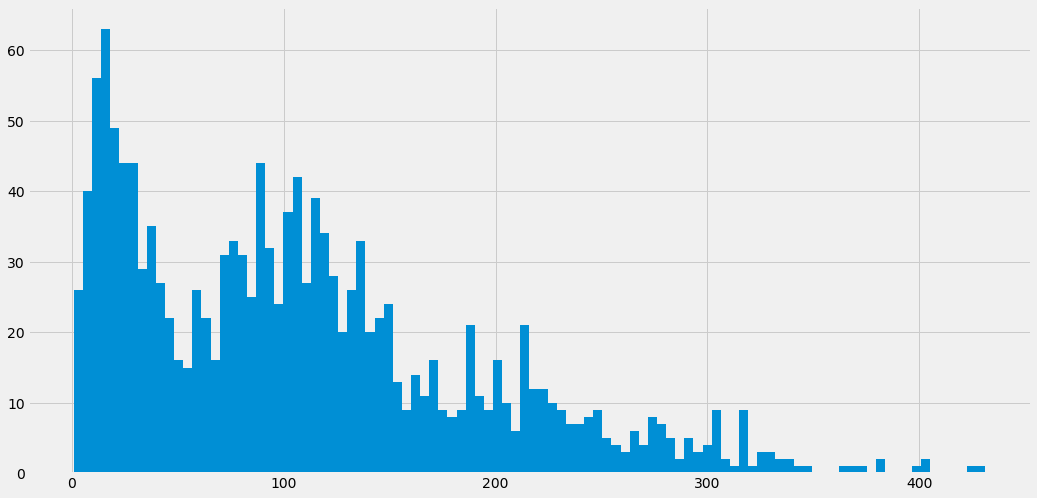

In [9]:
trn['count'].hist(bins=100)

## 독립변수 분포

<AxesSubplot:>

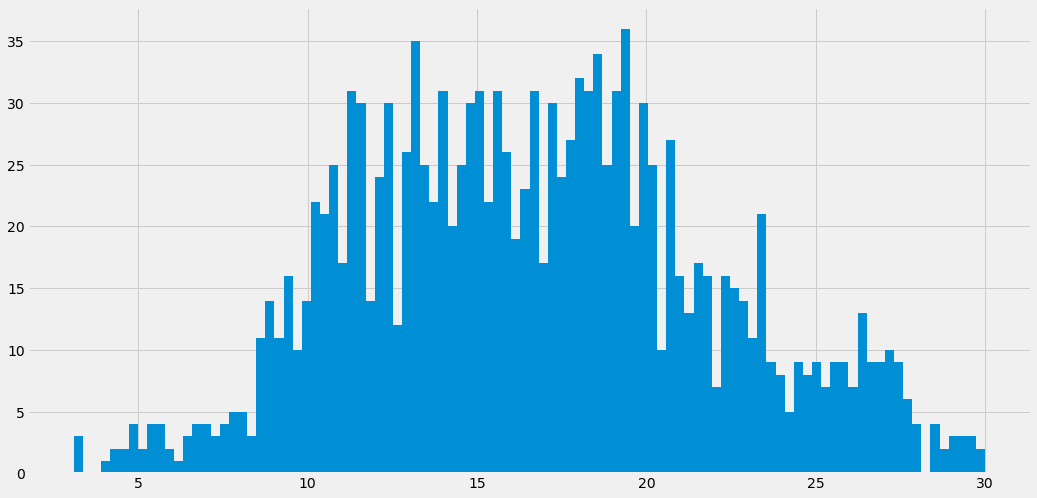

In [12]:
trn['hour_bef_temperature'].hist(bins=100)

In [15]:
trn['hour_bef_temperature'].quantile(np.arange(0, 1, 0.1))

0.0     3.10
0.1    10.20
0.2    11.92
0.3    13.50
0.4    15.04
0.5    16.60
0.6    18.00
0.7    19.40
0.8    21.10
0.9    23.94
Name: hour_bef_temperature, dtype: float64

In [16]:
trn.loc[trn['hour_bef_temperature']<10.20]

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,,,,,,,,,,
8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
21,4,5.7,0.0,0.6,77.0,1960.0,0.028,14.0,18.0,6.0
27,10,9.2,0.0,1.9,55.0,462.0,0.023,91.0,84.0,60.0
49,2,8.9,0.0,0.9,52.0,839.0,0.011,80.0,71.0,10.0
90,7,8.9,0.0,0.2,75.0,642.0,0.033,66.0,36.0,19.0
...,...,...,...,...,...,...,...,...,...,...
2118,7,9.6,0.0,0.9,73.0,827.0,0.021,59.0,30.0,16.0
2121,8,8.6,0.0,2.0,89.0,223.0,0.010,74.0,64.0,34.0
2128,6,8.5,0.0,1.5,55.0,2000.0,0.036,31.0,18.0,29.0


## 시각화

In [19]:
trn_sample = trn.sample(n=200, random_state=seed)

C:\Users\math8\anaconda3\envs\seoul-bicycle\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\math8\anaconda3\envs\seoul-bicycle\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\math8\anaconda3\envs\seoul-bicycle\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\math8\anaconda3\envs\seoul-bicycle\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


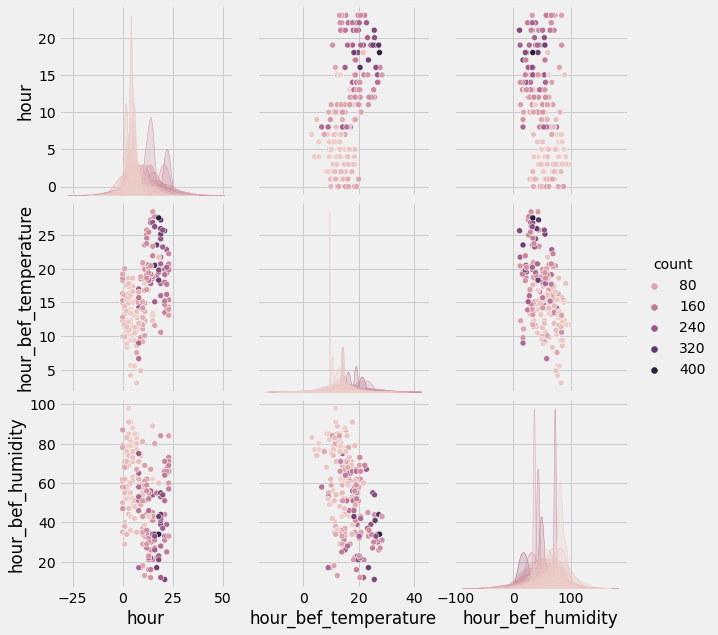

In [22]:
sns.pairplot(data=trn_sample, vars=['hour', 'hour_bef_temperature', 'hour_bef_humidity'], hue = 'count', size = 3)